# t-SNE USING SKLEARN FOR VISUALIZATION FO MNIST DATASET 

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [11]:
#load the dataset
data = pd.read_csv('mnist_train.csv',header=None)

In [12]:
data.shape

(60000, 785)

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#labels are kept in a different series (1D)
labels=data[0]
labels.shape

(60000,)

In [15]:
#all the rest features (784) are kept in features dataframe 
features=data.drop(columns=[0])

In [16]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standardize_data=sc.fit_transform(features)
standardize_data.shape

(60000, 784)

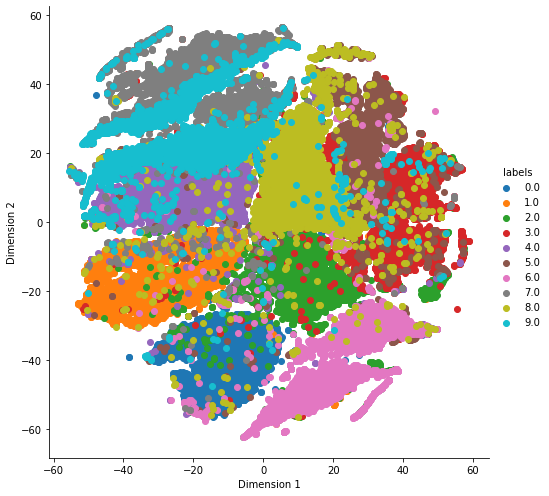

In [19]:
#USE TSNE from sklearn.manifold
from sklearn.manifold import TSNE

model=TSNE(n_components=2,random_state=0)

tsne_data=model.fit_transform(standardize_data)
#the model return embedded vectors of shape (samples,n_components)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2', 'labels'))

sns.FacetGrid(tsne_df,hue='labels', height=7)\
    .map(plt.scatter, 'Dimension 1', 'Dimension 2')\
    .add_legend()
plt.show()